# Auto classification: experiment on the thresholds

First, we slice along $r_K$ to see how the fixed points move, and in turn how to classify them (especially between pulsing/stochastic pulsing and oscillation

In [1]:
include("simu_utils.jl")
pyplot()

Plots.PyPlotBackend()

The threshold is fine. but for systems of different scales (max expression), you want to have different smooth sizes

Or here, we can use a small smooth size

KD/KS = 0.16666666666666666; KS = 2.0; τ₂/τ₁ = 5.0; β= 50.0; n = 3.0

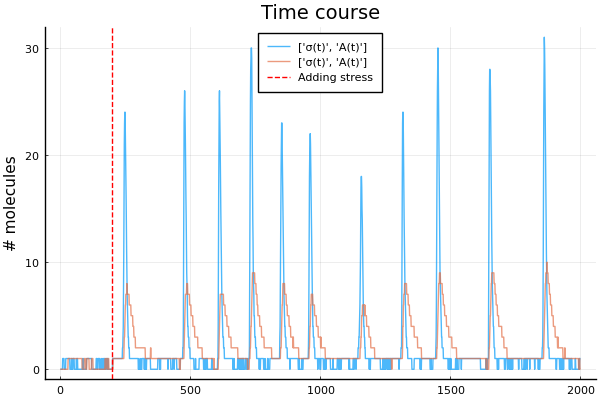

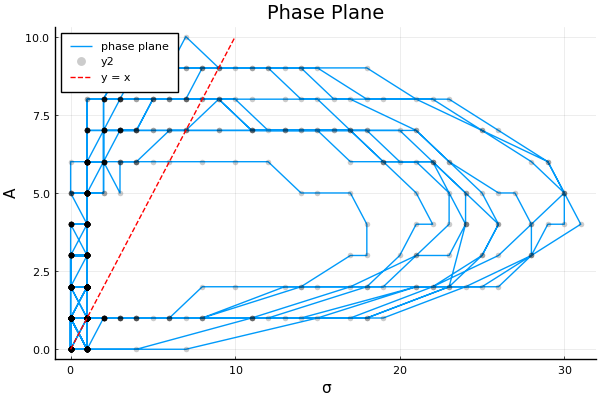

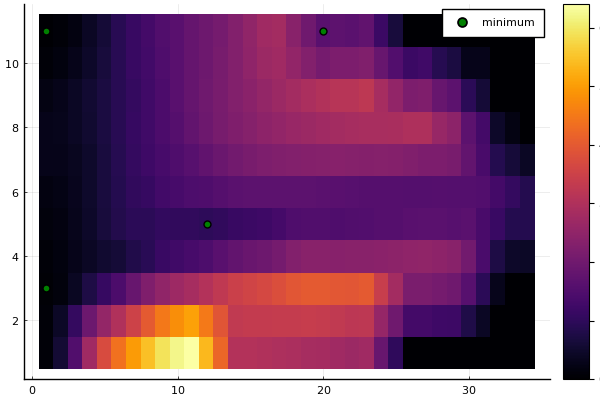

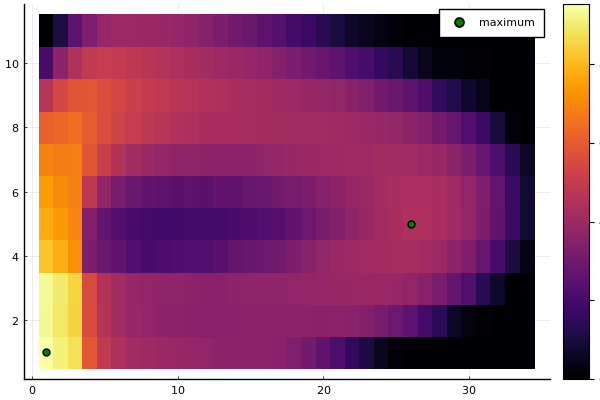

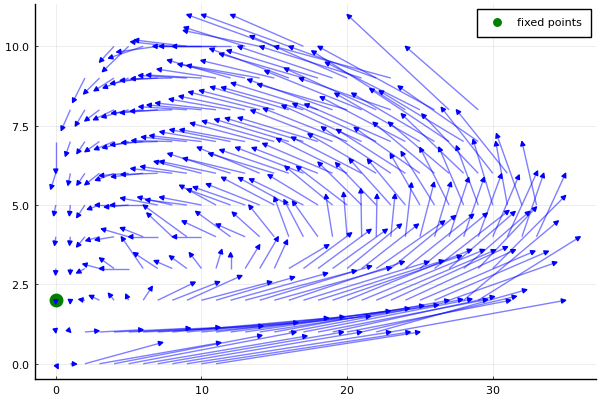

1×2 Array{Float64,2}:
 0.0  2.0

List of fixed points

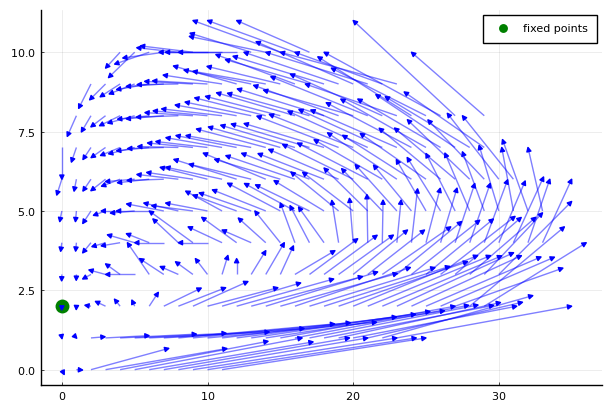


relative fp vector magnitude: 0.0011884840728158242


In [2]:
timescale = 5.0
timecourse = 1e5    # for gillespie 1e6    
smooth_size = 3    # depends on β
β = 50.0
n = 3.0

sigma_model = reaction_system()

# low K_S regime: the activation threshold is low,
# thus the interval between pulses is small
sol = simu_all(sigma_model, _KS = 2.0, _rK = 1.0/6.0, _β = β, _τ₁ = timescale, _rτ = 5.0, _n = n, _η = 0.2,
    show_hill = false, max_t = timecourse, method = "sde")

# vector field analysis
dσdt, dAdt, magnitude, passage = vector_field(sol, 200.0, 1.0)
plot_vf(dσdt, dAdt)    # currently the vf plot is separate. maybe change
ms = naive_smooth_2d(magnitude, smooth_size)
ps = naive_smooth_2d(passage, smooth_size)

# plot the min/max of vector length and density
# not necessary, included in find_fp(), but is useful when debugging
pm = heatmap(1:size(magnitude, 1), 1:size(magnitude, 2), ms')
pp = heatmap(1:size(magnitude, 1), 1:size(magnitude, 2), log.(ps' .+ 1))
v_min = local_min_2d(ms, 3)
d_min = local_min_2d(-ps, 3)
display(scatter!(pm, v_min[:, 1], v_min[:, 2], color = :green, labels = "minimum", markersize = 5));
display(scatter!(pp, d_min[:, 1], d_min[:, 2], color = :green, labels = "maximum", markersize = 5));

# plot fixed points on vf
fp = find_fp(sol, 200.0, 1.0, β, smooth_size = smooth_size, 
    neighbor_size = 3, thres_v = 0.002, thres_d = 1e-4)
display(plot_vf_w_fp(dσdt, dAdt, fp, scale = 2.0))

# examine the relative vector length
println("List of fixed points")
display(fp)
for i = 1:size(fp, 1)
    println("relative fp vector magnitude: ", 
        magnitude[Int64(fp[i, 1] + 1), Int64(fp[i, 2] + 1)] / β)
#     println("relative density: ", 
#         passage[Int64(fp[i, 1] + 1), Int64(fp[i, 2] + 1)] / (timecourse - 200))
end

## One more step to classification

In [7]:
fluc_level = sqrt(β / n)

n_fp = size(fp, 1)
println("The number of fixed points: ", n_fp)

is_small_fp = [fp[i, 1] < fluc_level && fp[i, 2] < fluc_level for i = 1:size(fp, 1)]
println("The is one and only fp around zero: ", sum(is_small_fp) == 1)

fluc_level_int = Int64(round(fluc_level))
reverse_flow = mean(magnitude[1:fluc_level_int, fluc_level_int])
println("There is reverse flow: ", reverse_flow > maximum(magnitude) * 0.01)

The number of fixed points: 1
The is one and only fp around zero: true
There is reverse flow: true
